## 3.1 RNN

In [83]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [84]:
tweets_with_labels = pd.read_csv("twitter-data/tweets_with_labels.csv",sep ="\t")

In [85]:
attr = tweets_with_labels['tweet']
label = tweets_with_labels.drop(['tweet', 'id'],axis = 1).values
print (y)

[[0.    0.    0.    ... 0.    0.    0.   ]
 [0.    0.    0.    ... 0.    0.    0.   ]
 [0.    0.    0.    ... 0.    0.    0.   ]
 ...
 [0.    0.    0.    ... 1.    0.    0.   ]
 [0.    0.579 0.    ... 0.    0.    0.   ]
 [0.    0.338 0.    ... 0.    0.    0.   ]]


In [86]:
# get train, validation and test set
x_train, x_test, y_train, y_test = train_test_split(
    attr,label, test_size=0.2, random_state=1)
x_train, x_val, y_train, y_val = train_test_split(
    x_train, y_train, test_size=0.25, random_state=1)
print (x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(46767,) (15590,) (46767, 15) (15590, 15)


In [87]:
from keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer(num_words=1000)
tokenizer.fit_on_texts(x_train)

In [88]:
train_seq = tokenizer.texts_to_sequences(x_train) 
test_seq = tokenizer.texts_to_sequences(x_test)
val_seq = tokenizer.texts_to_sequences(x_val)

In [89]:
from keras.preprocessing.sequence import pad_sequences
x_train = pad_sequences(train_seq,maxlen=100)
x_test = pad_sequences(test_seq,maxlen=100)
x_val = pad_sequences(val_seq,maxlen=100)

In [123]:
# use the model SimpleRNN to train
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.layers import Embedding
from keras.layers import SimpleRNN
SimpleRNN_model = Sequential()
SimpleRNN_model.add(Embedding(1000, 64))
SimpleRNN_model.add(SimpleRNN(64))
SimpleRNN_model.add(Dense(15, activation ='softmax'))
SimpleRNN_model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics=['accuracy'])
#print (SimpleRNN_model.summary())
SimpleRNN_model_info = SimpleRNN_model.fit(x_train, y_train, epochs = 10, batch_size = 200, validation_data =(x_val,y_val))

Train on 46767 samples, validate on 15589 samples
Epoch 1/10
46767/46767 [==============================] - 16s 336us/step - loss: 2.1253 - acc: 0.5135 - val_loss: 1.5903 - val_acc: 0.7238
Epoch 2/10
46767/46767 [==============================] - 14s 294us/step - loss: 1.4517 - acc: 0.7649 - val_loss: 1.8662 - val_acc: 0.6310
Epoch 3/10
46767/46767 [==============================] - 14s 299us/step - loss: 1.3620 - acc: 0.7801 - val_loss: 1.2851 - val_acc: 0.8051
Epoch 4/10
46767/46767 [==============================] - 15s 316us/step - loss: 1.2527 - acc: 0.8054 - val_loss: 1.2550 - val_acc: 0.8096
Epoch 5/10
46767/46767 [==============================] - 12s 259us/step - loss: 1.2238 - acc: 0.8098 - val_loss: 1.2445 - val_acc: 0.8104
Epoch 6/10
46767/46767 [==============================] - 12s 259us/step - loss: 1.2053 - acc: 0.8125 - val_loss: 1.2407 - val_acc: 0.8131
Epoch 7/10
46767/46767 [==============================] - 11s 242us/step - loss: 1.1909 - acc: 0.8151 - val_loss: 1.

In [124]:
accr = SimpleRNN_model.evaluate(x_test,y_test)

15590/15590 [==============================] - 3s 167us/step


In [125]:
print (accr)

[1.2354030096660906, 0.8073765234124439]


## 3.2 CNN

In [127]:
from keras.layers import Conv1D, GlobalMaxPooling1D

oned_cnn_model = Sequential()
oned_cnn_model.add(Embedding(1000,128))
oned_cnn_model.add(Conv1D(64,3,padding='valid',activation='relu',strides=1))
oned_cnn_model.add( GlobalMaxPooling1D() )
oned_cnn_model.add(Dense(15,activation='sigmoid'))
oned_cnn_model.compile(optimizer = 'adam',loss = 'categorical_crossentropy', metrics=['acc'])
oned_cnn_model_info = oned_cnn_model.fit(x_train, y_train,epochs = 10, batch_size = 200, validation_data =(x_val,y_val),verbose=1)

Train on 46767 samples, validate on 15589 samples
Epoch 1/10
46767/46767 [==============================] - 17s 353us/step - loss: 1.9318 - acc: 0.5474 - val_loss: 1.1978 - val_acc: 0.8166
Epoch 2/10
46767/46767 [==============================] - 15s 313us/step - loss: 1.1609 - acc: 0.8185 - val_loss: 1.1367 - val_acc: 0.8216
Epoch 3/10
46767/46767 [==============================] - 16s 342us/step - loss: 1.1174 - acc: 0.8245 - val_loss: 1.1221 - val_acc: 0.8242
Epoch 4/10
46767/46767 [==============================] - 15s 323us/step - loss: 1.0938 - acc: 0.8290 - val_loss: 1.1159 - val_acc: 0.8267
Epoch 5/10
46767/46767 [==============================] - 15s 328us/step - loss: 1.0763 - acc: 0.8317 - val_loss: 1.1180 - val_acc: 0.8241
Epoch 6/10
46767/46767 [==============================] - 14s 307us/step - loss: 1.0611 - acc: 0.8358 - val_loss: 1.1170 - val_acc: 0.8256
Epoch 7/10
46767/46767 [==============================] - 14s 301us/step - loss: 1.0480 - acc: 0.8388 - val_loss: 1.

In [128]:
accr = oned_cnn_model.evaluate(x_test,y_test)
print (accr)

15590/15590 [==============================] - 1s 90us/step
[1.155099302243544, 0.8200769724105703]


In [131]:
print (oned_cnn_model.history)

#### Below is the comparison of the 2 methods

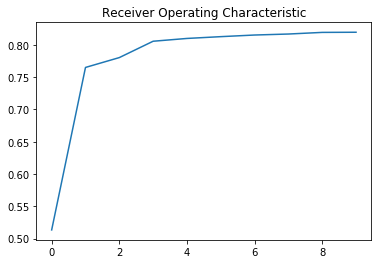

In [146]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification

import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot([i for i in range(10)], SimpleRNN_model_info.history['acc'])

plt.show()

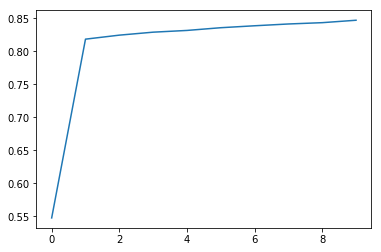

In [144]:

plt.plot([i for i in range(10)], oned_cnn_model_info.history['acc'])

plt.show()